# HW3 - Stock Movement Prediction

作業檔案：
- hw3.ipynb

資料：
https://www.sharecast.com/index/SP_500/prices/download

- train.csv: S&P 500 訓練資料(2009-2017)
- test.csv: S&P 500 測試資料(2018)


In [1]:
# Read data

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

train_data_path = './train.csv'
test_data_path = './test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

print(train_df.shape)
print(train_df.head())
print(test_df.shape)
print(test_df.head())

(2264, 6)
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1  05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2  06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3  07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4  08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
(252, 6)
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2018     2683.73      2695.81     2695.89    2682.36  1846463232
1  03-Jan-2018     2697.85      2713.06     2714.37    2697.77  2090595328
2  04-Jan-2018     2719.31      2723.99     2729.29    2719.07  2100767744
3  05-Jan-2018     2731.33      2743.15     2743.45    2727.92  1918869120
4  08-Jan-2018     2742.67      2747.71     2748.51    2737.60  1894823936


In [2]:
# Drop unnecessary columns

drop_col_names = ['Date'] # !--- or you can modify it to drop the columns you don't want ---!

train_df.drop(columns=drop_col_names, inplace=True)
test_df.drop(columns=drop_col_names, inplace=True)

print(train_df.shape)
print(train_df.head())
print(test_df.shape)
print(test_df.head())

(2264, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0      902.99       931.80      934.73     899.35  4048270080
1      929.17       927.45      936.63     919.53  5413910016
2      931.17       934.70      943.85     927.28  5392620032
3      927.45       906.65      927.45     902.37  4704940032
4      905.73       909.73      910.00     896.81  4991549952
(252, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0     2683.73      2695.81     2695.89    2682.36  1846463232
1     2697.85      2713.06     2714.37    2697.77  2090595328
2     2719.31      2723.99     2729.29    2719.07  2100767744
3     2731.33      2743.15     2743.45    2727.92  1918869120
4     2742.67      2747.71     2748.51    2737.60  1894823936


In [3]:
# Add the column `Tomorrow Movement` by comparing the `Close Price` with the previous days as the training target

train_df['Tomorrow Movement'] = np.where(train_df['Close Price'].diff() >= 0, 1, 0)
test_df['Tomorrow Movement'] = np.where(test_df['Close Price'].diff() >= 0, 1, 0)

train_df['Tomorrow Movement'] = train_df['Tomorrow Movement'].shift(-1)
test_df['Tomorrow Movement'] = test_df['Tomorrow Movement'].shift(-1)

print(train_df.head())
print(train_df.tail())

   Open Price  Close Price  High Price  Low Price      Volume  \
0      902.99       931.80      934.73     899.35  4048270080   
1      929.17       927.45      936.63     919.53  5413910016   
2      931.17       934.70      943.85     927.28  5392620032   
3      927.45       906.65      927.45     902.37  4704940032   
4      905.73       909.73      910.00     896.81  4991549952   

   Tomorrow Movement  
0                0.0  
1                1.0  
2                0.0  
3                1.0  
4                0.0  
      Open Price  Close Price  High Price  Low Price      Volume  \
2259     2684.22      2683.34     2685.35    2678.13  1383888512   
2260     2679.09      2680.50     2682.74    2677.96  1103808384   
2261     2682.10      2682.62     2685.64    2678.91  1149108352   
2262     2686.10      2687.54     2687.66    2682.69  1126089856   
2263     2689.15      2673.61     2692.12    2673.61  1332374016   

      Tomorrow Movement  
2259                0.0  
2260      

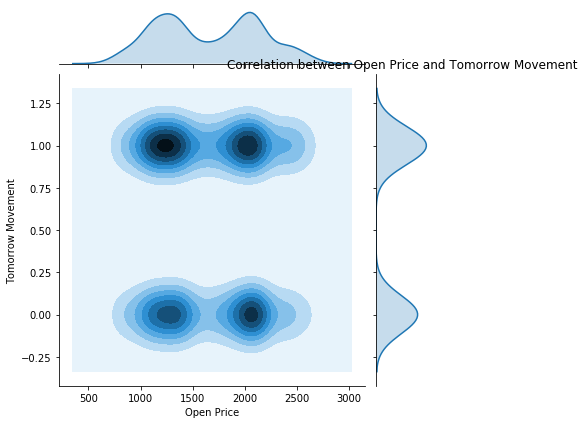

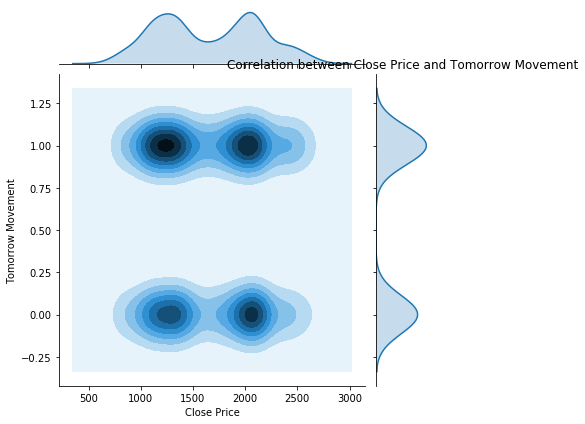

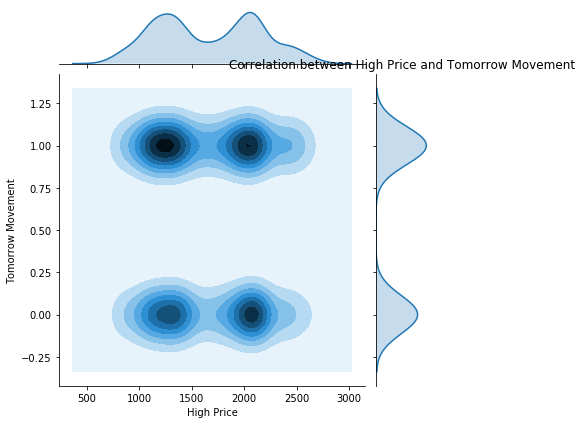

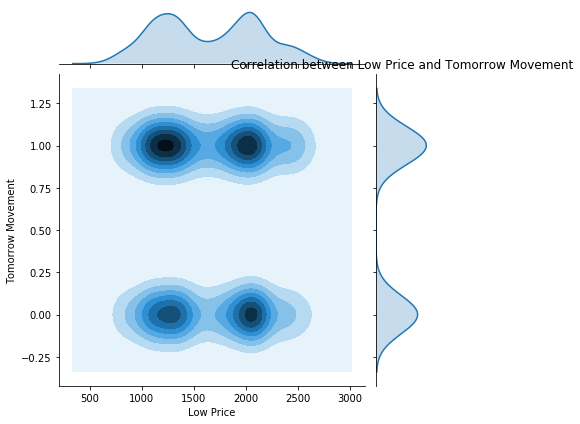

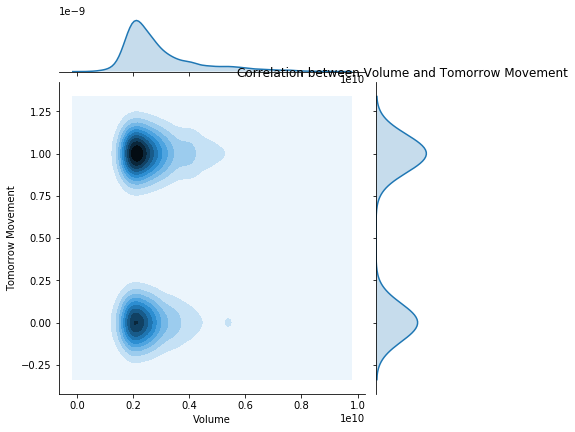

In [4]:
# !--- You can add your own data preprocessing here ---!
for feature in train_df.columns:
    if feature == 'Tomorrow Movement':
        continue
    sns.jointplot(x=feature, y='Tomorrow Movement', data=train_df, kind='kde') #kde = kernel density estimation
    plt.title('Correlation between %s and Tomorrow Movement' % feature)
    plt.show()

In [5]:
# Drop rows with NaN values

train_df = train_df.dropna()
test_df = test_df.dropna()

print(train_df.shape)
print(test_df.shape)

(2263, 6)
(251, 6)


In [6]:
# Divide x and y data

train_x_df = train_df.drop(columns=['Tomorrow Movement'])
train_y_df = train_df['Tomorrow Movement']

test_x_df = test_df.drop(columns=['Tomorrow Movement'])
test_y_df = test_df['Tomorrow Movement']

print(train_x_df.shape)
print(train_x_df.head())
print(train_y_df.shape)
print(train_y_df.head())
print('-----')
print(test_x_df.shape)
print(test_x_df.head())
print(test_y_df.shape)
print(test_y_df.head())

(2263, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0      902.99       931.80      934.73     899.35  4048270080
1      929.17       927.45      936.63     919.53  5413910016
2      931.17       934.70      943.85     927.28  5392620032
3      927.45       906.65      927.45     902.37  4704940032
4      905.73       909.73      910.00     896.81  4991549952
(2263,)
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Tomorrow Movement, dtype: float64
-----
(251, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0     2683.73      2695.81     2695.89    2682.36  1846463232
1     2697.85      2713.06     2714.37    2697.77  2090595328
2     2719.31      2723.99     2729.29    2719.07  2100767744
3     2731.33      2743.15     2743.45    2727.92  1918869120
4     2742.67      2747.71     2748.51    2737.60  1894823936
(251,)
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Tomorrow Movement, dtype: float64


In [7]:
# Normalize data

# !--- Modify here if you want ---!

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x_df)

normalized_train_x_df = scaler.transform(train_x_df)
normalized_train_x_df = np.transpose(normalized_train_x_df)

normalized_train_x_df = pd.DataFrame({
    'Open Price': normalized_train_x_df[0],
    'Close Price': normalized_train_x_df[1],
    'High Price': normalized_train_x_df[2],
    'Low Price': normalized_train_x_df[3],
    'Volume': normalized_train_x_df[4],
})

normalized_test_x_df = scaler.transform(test_x_df)
normalized_test_x_df = np.transpose(normalized_test_x_df)
normalized_test_x_df = pd.DataFrame({
    'Open Price': normalized_test_x_df[0],
    'Close Price': normalized_test_x_df[1],
    'High Price': normalized_test_x_df[2],
    'Low Price': normalized_test_x_df[3],
    'Volume': normalized_test_x_df[4],
})

print(normalized_train_x_df.head())
print(train_y_df[:5])

   Open Price  Close Price  High Price  Low Price    Volume
0   -1.552572    -1.494607   -1.505683  -1.541181  0.813175
1   -1.498571    -1.503581   -1.501760  -1.499581  1.823826
2   -1.494446    -1.488625   -1.486853  -1.483605  1.808070
3   -1.502119    -1.546489   -1.520714  -1.534956  1.299148
4   -1.546921    -1.540136   -1.556744  -1.546417  1.511255
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Tomorrow Movement, dtype: float64


C:\Users\IDEA3C\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\IDEA3C\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IDEA3C\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


# Logistic Regression

In [8]:
# Train & Predict using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression() # !--- Initialize the model here ---!
lr_model.fit(normalized_train_x_df,train_y_df) # !-- Fill the training data here --!

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
lr_training_acc = np.mean(lr_model.predict(normalized_train_x_df) == train_y_df)
print(lr_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
lr_predict_test_result = lr_model.predict(normalized_test_x_df)
lr_testing_acc = np.mean(lr_predict_test_result == test_y_df)
print(lr_testing_acc)

print('\npredicted testing labels:')
print(lr_predict_test_result)

training accuracy:
0.5475033141847105

testing accuracy:
0.5258964143426295

predicted testing labels:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


C:\Users\IDEA3C\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# Print precision, recall, fbeta-score and confusion matrix

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, lr_predict_test_result, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, lr_predict_test_result).ravel()
print((tn, fp, fn, tp))

precision, recall, fbeta-score:
(0.5137282196515144, 0.5258964143426295, 0.3694764768608263, None)

confusion matrix(tn, fp, fn, tp):
(1, 118, 1, 131)


# SVM

In [10]:
# Train & Predict with SVC

from sklearn.svm import SVC

svc_model = SVC(gamma='scale') # !--- Initialize the model here ---!
svc_model.fit(normalized_train_x_df,train_y_df) # !-- Fill the training data here --!

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
print(svc_model.predict(train_x_df))

svc_training_acc = np.mean(svc_model.predict(normalized_train_x_df) == train_y_df)
print(svc_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
svc_predict_test_result = svc_model.predict(normalized_test_x_df)
svc_testing_acc = np.mean(svc_predict_test_result == test_y_df)
print(svc_testing_acc)

print('\npredicted testing labels:')
print(svc_predict_test_result)

training accuracy:
[1. 1. 1. ... 1. 1. 1.]
0.5483870967741935

testing accuracy:
0.5258964143426295

predicted testing labels:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
# Print precision, recall, fbeta-score and confusion matrix

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, lr_predict_test_result, average='weighted',labels=np.unique( lr_predict_test_result)))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, lr_predict_test_result).ravel()
print((tn, fp, fn, tp))

precision, recall, fbeta-score:
(0.5137282196515144, 0.5258964143426295, 0.3694764768608263, None)

confusion matrix(tn, fp, fn, tp):
(1, 118, 1, 131)


# Neural Network

In [12]:
# Define NN output groundtruth
falling_prob = pd.DataFrame(data=np.where(train_y_df == 0, 1, 0)[:])
train_y_df_NN = pd.DataFrame(data=np.where(train_y_df == 0, 0, 1)[:],dtype = 'float64')
train_y_df_NN = pd.concat( [ falling_prob, train_y_df ], axis=1, ignore_index=True )

falling_prob = pd.DataFrame(data=np.where(test_y_df == 0, 1, 0)[:])
test_y_df_NN = pd.DataFrame(data=np.where(test_y_df == 0, 0, 1)[:],dtype = 'float64')
test_y_df_NN = pd.concat( [ falling_prob, test_y_df ], axis=1, ignore_index=True )

print(train_y_df_NN.shape)
print(train_y_df_NN.head())

(2263, 2)
   0    1
0  1  0.0
1  0  1.0
2  1  0.0
3  0  1.0
4  1  0.0


In [13]:
# Define NN structure

import torch
import torch.nn.functional as F

# !--- You can modify the NN structure here ---!
class M_NN(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(M_NN, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        self.linear3 = torch.nn.Linear(H, H)

    def forward(self, x):
        # Input layer
        h = self.linear1(x)
        act_out = F.relu(h)
        # Hidden layer
        h1 = self.linear3(act_out)
        act2_out = F.relu(h1)
        # Output layer
        h2 = self.linear2(act2_out)
        y_pred = F.relu(h2)
        
        return y_pred

# N = batch size, D_in = input size, H = hidden size, D_out = output size
N, D_in, H, D_out = 300, 5, 100, 2  # !--- You can modify here ---!

model = M_NN(D_in, H, D_out)
criterion = torch.nn.BCEWithLogitsLoss(reduction='mean')  # !--- You can modify here ---!
optimizer = torch.optim.SGD(model.parameters(), lr=3e-2) # !--- You can modify here ---!

# Train NN
# !--- You can modify here ---!

for t in range(1000):
    for batch_num in range(N, len(normalized_train_x_df), N): 
        data = torch.tensor(normalized_train_x_df.iloc[batch_num-N:batch_num].values) # !-- Transfer data into tensor form --!
        y_pred = model(data.float()) # !-- Fill the training batch data here --!
        target = torch.tensor(train_y_df_NN.iloc[batch_num-N:batch_num].values) # !-- Transfer target into tensor form --!
        loss = criterion(y_pred,target.float()) # !-- Fill the prediction & groundtruth here to calculate loss --!
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (t%10 == 0):
        print('epoch:%d - loss:%.10f' % (t, loss.item()))

epoch:0 - loss:0.6931473017
epoch:10 - loss:0.6930319667
epoch:20 - loss:0.6922587752
epoch:30 - loss:0.6919710040
epoch:40 - loss:0.6918529868
epoch:50 - loss:0.6917884946
epoch:60 - loss:0.6917416453
epoch:70 - loss:0.6917062998
epoch:80 - loss:0.6916759014
epoch:90 - loss:0.6916496158
epoch:100 - loss:0.6916269660
epoch:110 - loss:0.6916087866
epoch:120 - loss:0.6915932298
epoch:130 - loss:0.6915794611
epoch:140 - loss:0.6915652752
epoch:150 - loss:0.6915507913
epoch:160 - loss:0.6915347576
epoch:170 - loss:0.6915132999
epoch:180 - loss:0.6914919019
epoch:190 - loss:0.6914728880
epoch:200 - loss:0.6914578676
epoch:210 - loss:0.6914442778
epoch:220 - loss:0.6914290786
epoch:230 - loss:0.6913946271
epoch:240 - loss:0.6913595796
epoch:250 - loss:0.6913108826
epoch:260 - loss:0.6912655234
epoch:270 - loss:0.6912391782
epoch:280 - loss:0.6912074089
epoch:290 - loss:0.6911900640
epoch:300 - loss:0.6911898851
epoch:310 - loss:0.6911947727
epoch:320 - loss:0.6911776662
epoch:330 - loss:0.69

In [14]:
# Predict
x_train = torch.tensor(normalized_train_x_df.values).float()
nn_predict_train_y = model(x_train) # !-- Predict training data here --!
result_train = np.where(nn_predict_train_y[:, 0] > nn_predict_train_y[:, 1], 0, 1) # !-- You can modify here --!
print('training accuracy:')
print(accuracy_score(train_y_df, result_train))

x_test = torch.tensor(normalized_test_x_df.values).float()
nn_predict_test_y = model(x_test) # !-- Predict training data here --!
result_test = np.where(nn_predict_test_y[:, 0] > nn_predict_test_y[:, 1], 0, 1) # !-- You can modify here --!
print('\ntesting accuracy:')
print(accuracy_score(test_y_df, result_test))

print('\npredicted testing prob:')
print(nn_predict_test_y)
print('\npredicted testing labels:')
print(result_test)

training accuracy:
0.5475033141847105

testing accuracy:
0.5258964143426295

predicted testing prob:
tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.5833e-02],
        [0.0000e+00, 8.1181e-03],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.9976e-03],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.7452e-03],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.3339e-02],
        [0.0000e+00, 9.8404e-03],
        [0.0000e+00, 5.0767e-02],
        [0.0000e+00, 1.6413e-01],
        [0.0000e+00, 2.1316e-01],
        [0.0000e+00, 8.4197e-02],
        [0.0000

        [0.0000e+00, 2.6589e-02]], grad_fn=<ReluBackward0>)

predicted testing labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [170]:
# Print precision, recall, fbeta-score and confusion matrix

print('\nprecision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, result_test, average='weighted',labels=np.unique(result_test)))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, result_test).ravel()
print((tn, fp, fn, tp))


precision, recall, fbeta-score:
(0.5078411628212425, 0.4900398406374502, 0.4486777108937876, None)

confusion matrix(tn, fp, fn, tp):
(93, 26, 102, 30)


# Discussion

在比較freatures與Tomorrow Movement 作圖比較之後，發現各項features沒有到很明顯的趨勢fitting。
調整一些參數後，發現準確度依然在50%上下，因此我覺得可能是此樣本數據並不適合這些嘗試的model、也可能是data不夠多，還未有明顯的區分！